In [2]:
import pydub
import matplotlib.pyplot as plt
import os

before we feed data into NN we should preproccess them 
1_ we should concat all voices of each person , and make just one voice for each person .
2_ we sholud equalize different files suffixes
3_ we should ommit silent parts in audios . bc these parts are the same for all persons .
هوش مصنوعی باید با شندین زمان کمی از صدای افراد ، صاحب اون صدا رو تشخیص بده و نیازی به کل دو دقیقه نیست پس باید هر ویس را به تیکه های یک ثانیه ای تقسیم کنیم . تا حتی با گرفتن یک وویس ۵ ثانیه ای هم اون فرد رو درجا بشناسه 

In [4]:
# read an audio file :
voice = pydub.AudioSegment.from_file("raw_data/maryam.ogg")
voice

In [5]:
# save voice 
voice.export("new_voice.wav")

<_io.BufferedRandom name='new_voice.wav'>

## merge same users voices and convert them into one 

In [6]:
# concat 2 voices
voice_1 = pydub.AudioSegment.from_file("raw_data/khadijeh_1.ogg")
voice_2 = pydub.AudioSegment.from_file("raw_data/khadijeh_2.ogg")

result  = voice_1 + voice_2
f_result = result.export("data/khadijeh.ogg")

In [7]:
# concat 2 voices
voice_1 = pydub.AudioSegment.from_file("raw_data/parsa_1.ogg")
voice_2 = pydub.AudioSegment.from_file("raw_data/parsa_2.ogg")

result  = voice_1 + voice_2
f_result = result.export("data/parsa.ogg")

In [8]:
# convert audio format 

voice_1 = pydub.AudioSegment.from_file("raw_data/mona.m4a")
voice_1.export("data/mona.ogg")

<_io.BufferedRandom name='data/mona.ogg'>

<class 'pydub.audio_segment.AudioSegment'>
<class 'array.array'>


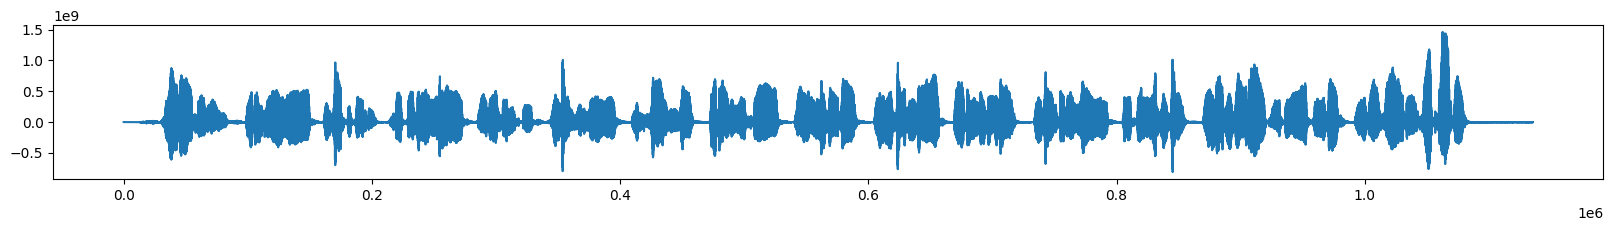

In [9]:
# plot voices 
voice_1 = pydub.AudioSegment.from_file("raw_data/melika.ogg")
print(type(voice_1)) # its an object from AudioSegment class

# we cant give AudioSegment object to matplotlib to plot it , bc it gets numpy array like
voice_2 = voice_1.get_array_of_samples()
print(type(voice_2))

plt.figure(figsize=(20,2))
plt.plot(voice_2)
plt.show()

# omit silent parts in files :

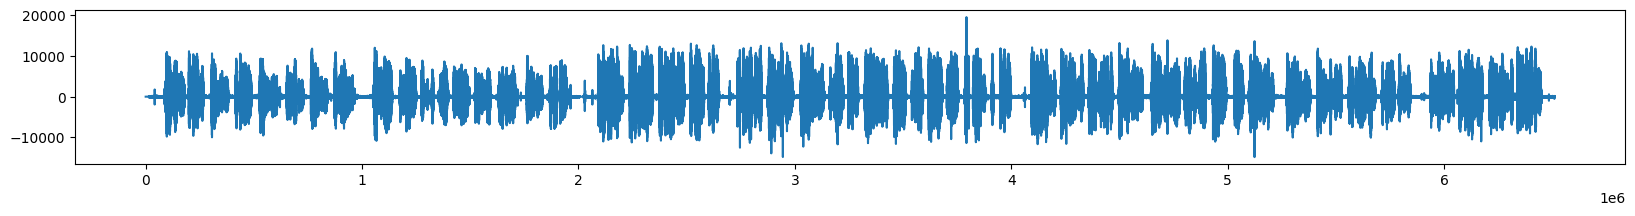

In [10]:
voice_1 = pydub.AudioSegment.from_file("raw_data/melika.ogg")
silent_parts = pydub.silence.split_on_silence(voice_1 , min_silence_len=2000 , silence_thresh=-45) # 1 sec = 1000
silent_parts
results = sum(silent_parts)
result.export("melika.ogg")

voice_1 = pydub.AudioSegment.from_file("melika.ogg")
voice_2 = voice_1.get_array_of_samples()
plt.figure(figsize=(20,2))
plt.plot(voice_2)
plt.show()

In [12]:
os.listdir("data")

['abdollah.ogg',
 'azra.ogg',
 'davood.ogg',
 'javad.ogg',
 'khadijeh.ogg',
 'kiana.ogg',
 'maryam.ogg',
 'matin.ogg',
 'melika.ogg',
 'mohammad.ogg',
 'mohammad_parvari.ogg',
 'mona.ogg',
 'nahid.ogg',
 'nima.ogg',
 'omid.ogg',
 'parisa.ogg',
 'parsa.ogg',
 'sadegh.ogg',
 'sajedeh.ogg',
 'shima.ogg',
 'tara.ogg']

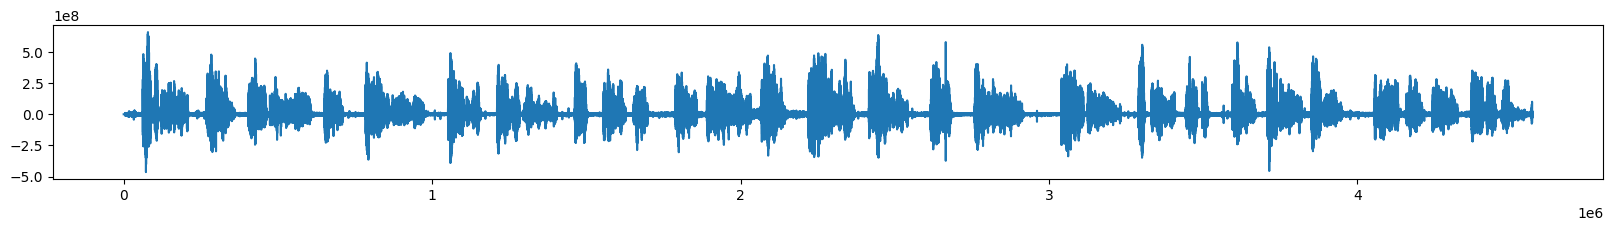

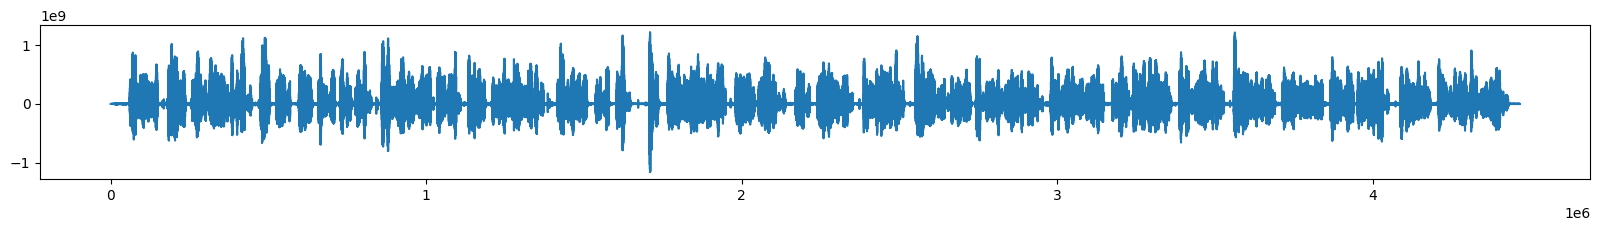

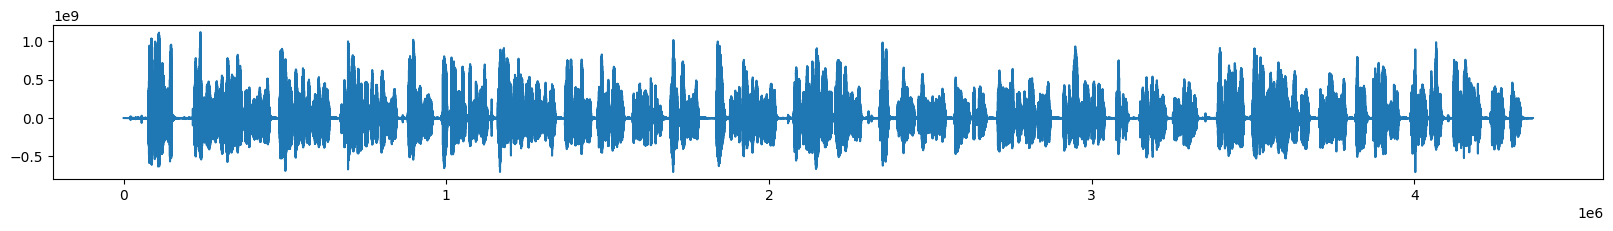

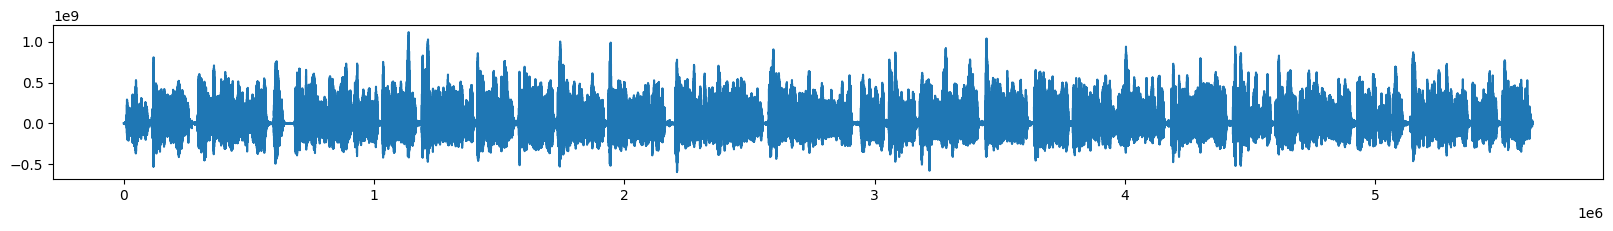

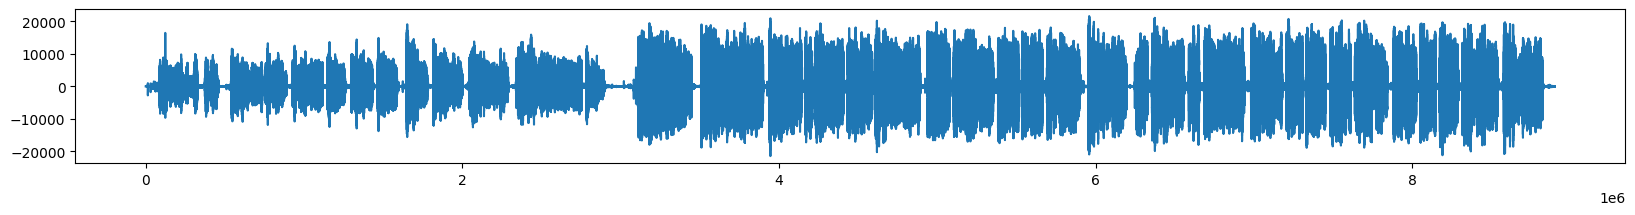

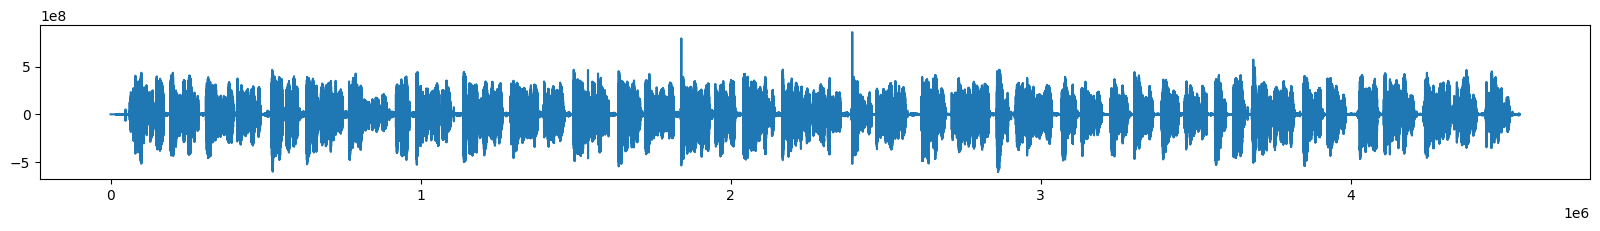

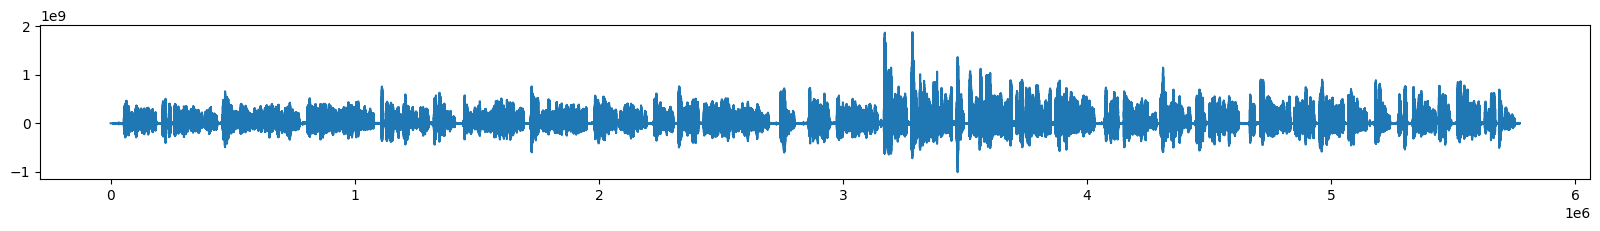

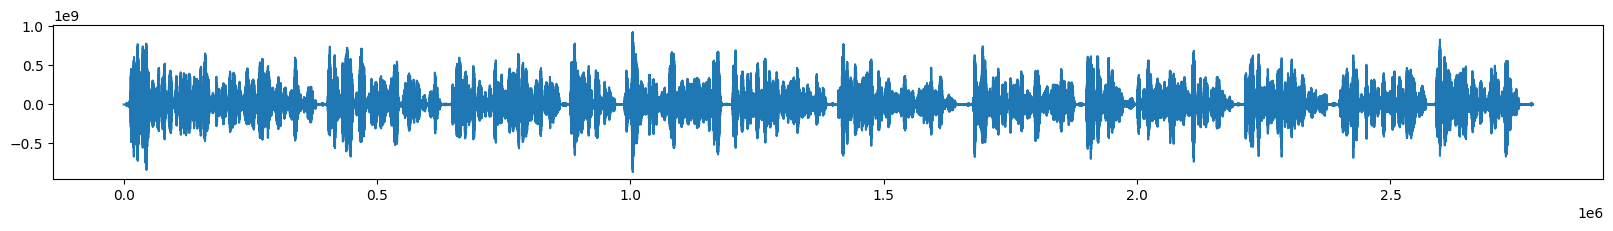

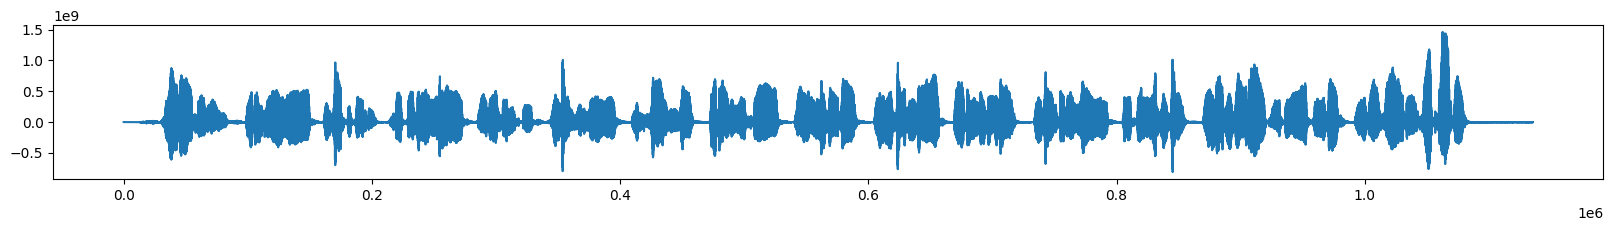

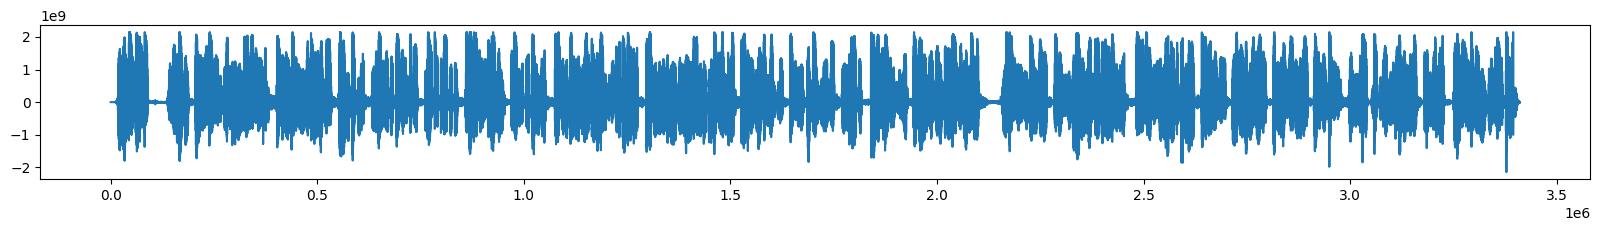

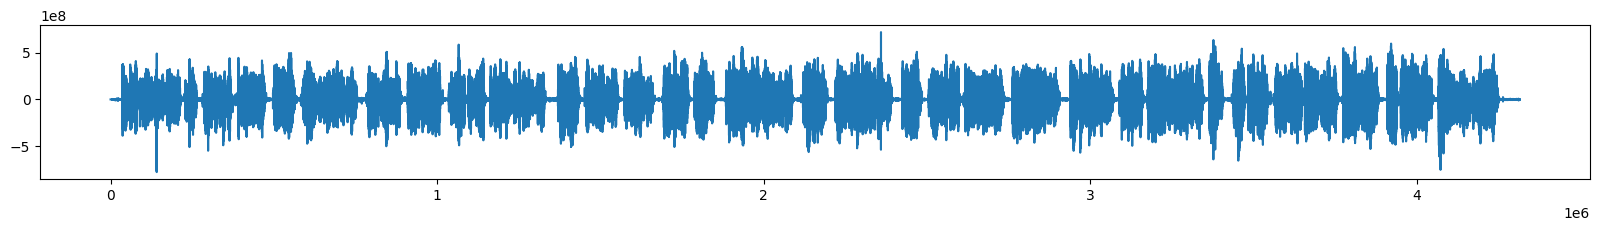

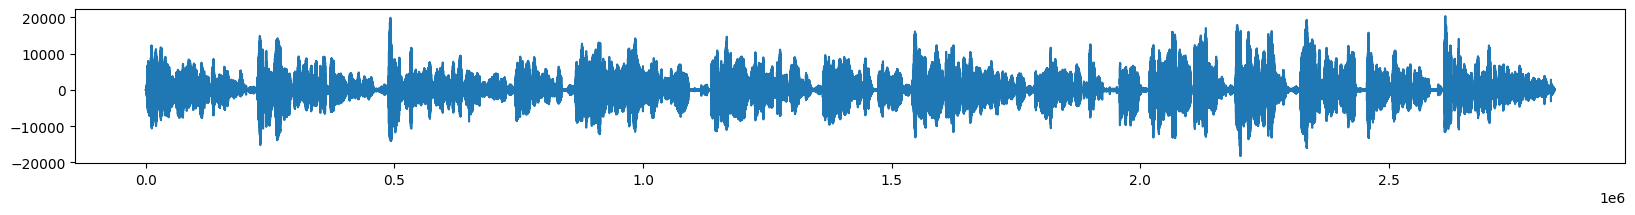

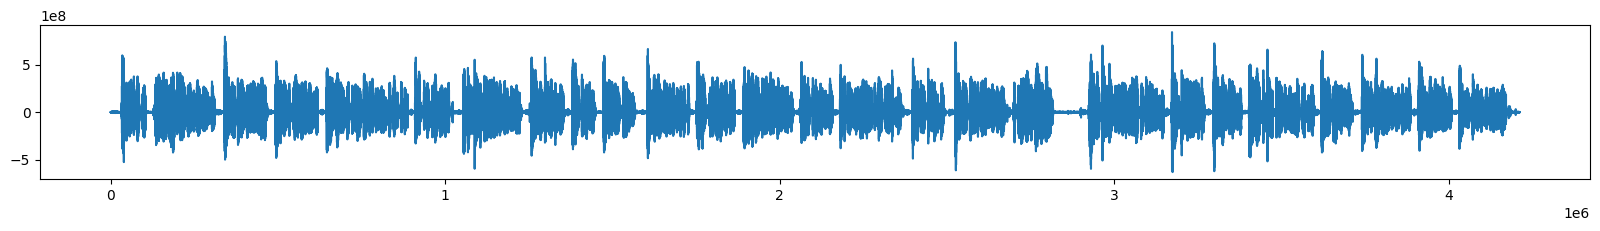

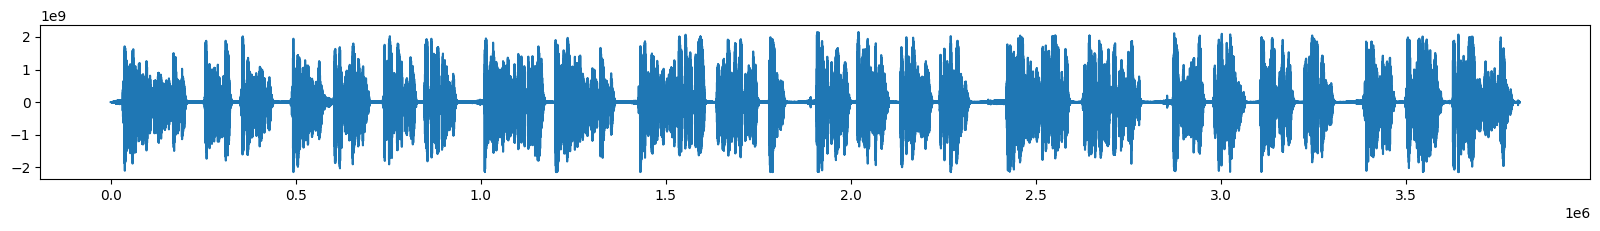

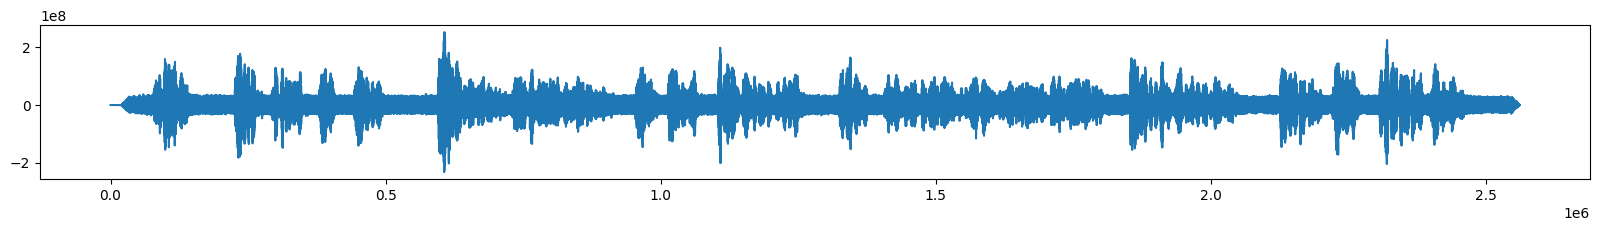

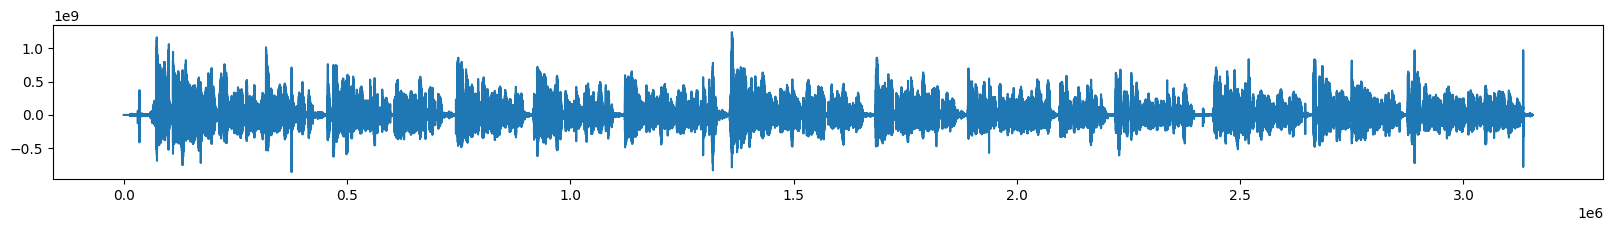

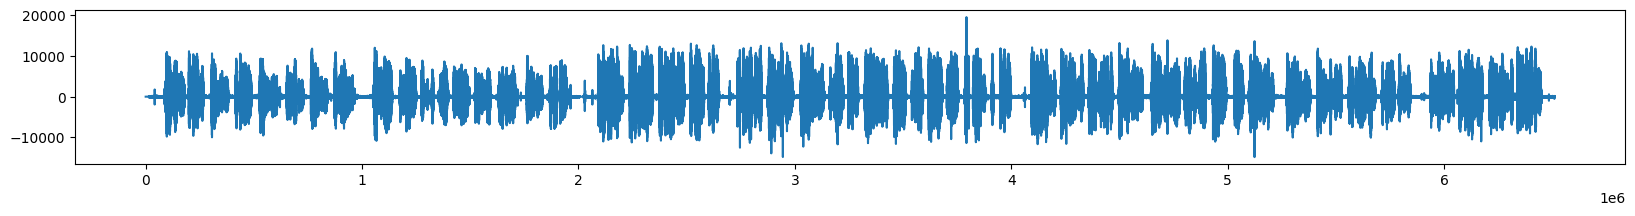

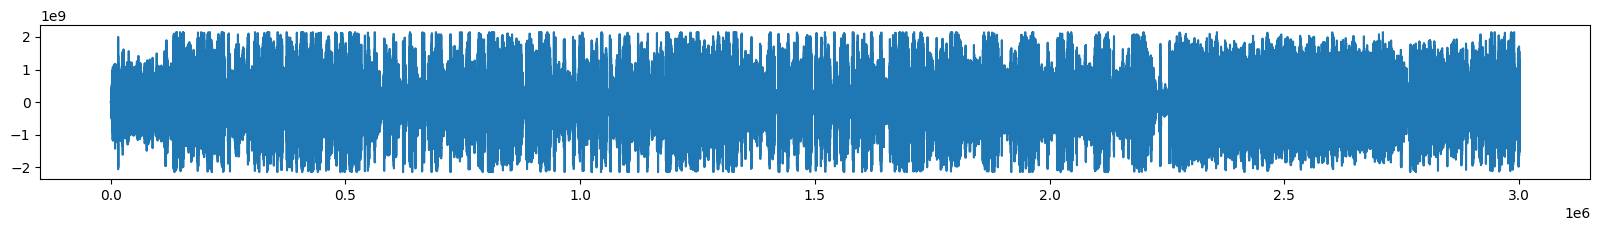

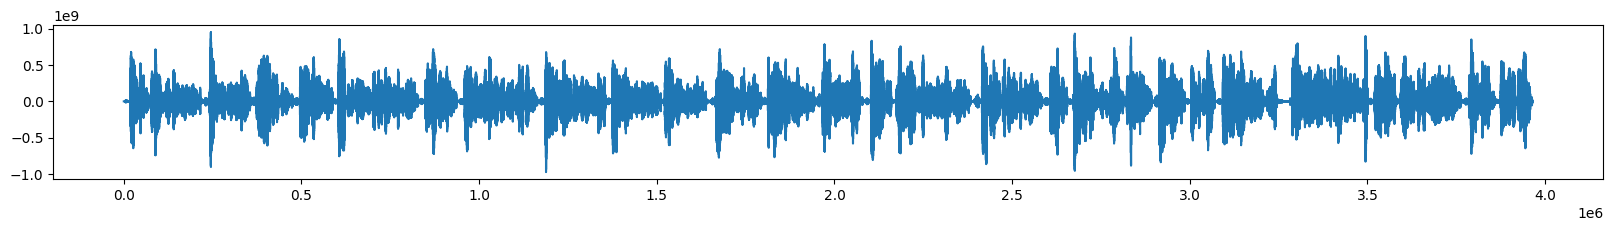

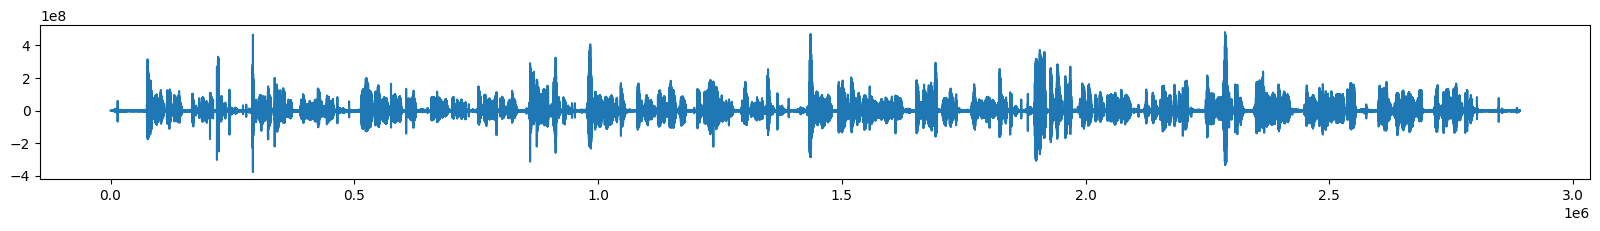

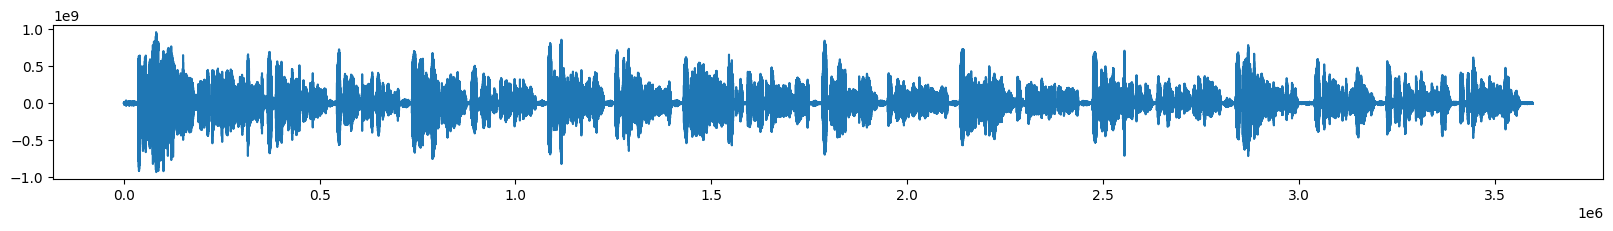

In [13]:
for file in os.listdir("data"):

    audio = pydub.AudioSegment.from_file(os.path.join("data" , file))
    audio_array = audio.get_array_of_samples()
    plt.figure(figsize=(20,2))
    plt.plot(audio_array)
    plt.show()    
    
    silent_chunks = pydub.silence.split_on_silence(audio , min_silence_len=2000 , silence_thresh=-45) 
    result = sum(silent_chunks)
    file_name = file.split(".")[0]
    result.export("wav_data/"+ file_name + ".wav")


## convert each audio file , into 1 second files 
--> export them into dataset folder 

In [3]:
for file in os.listdir("wav_data"):

    audio = pydub.AudioSegment.from_file(os.path.join("wav_data" , file))

    chunks = pydub.utils.make_chunks(audio , 1000)

    # create a folder for each person
    person_name = file.split(".")[0]
    os.makedirs(os.path.join("dataset" , person_name) , exist_ok=True)

    for i , chunk in enumerate(chunks) :
        
        if len(chunk) >= 1000 : # if len chunk is more than 1 second
            chunk.export(os.path.join("dataset" , person_name , f"voice_{i}.wav") , format="wav")# create a folder for each person in dataset folder , and create many 1 sec voice_i.wav

